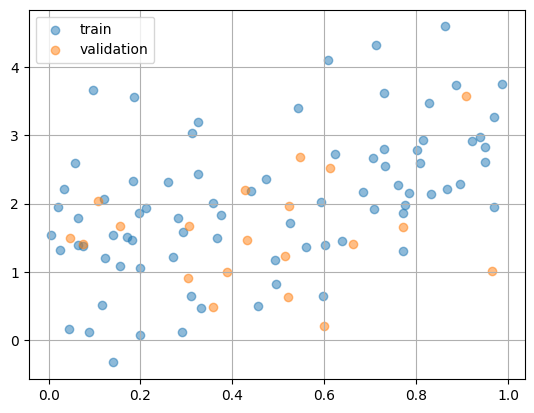

In [7]:
# page26

import numpy as np
import matplotlib.pyplot as plt

# Data Generation
np.random.seed(42)
x = np.random.rand(100,1)
y = 1 + 2 * x + 1 * np.random.randn(100,1)

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]

# Uses the remaining indices for validation
val_idx = idx[80:]

# Generation train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

# Plot
fig, ax = plt.subplots()

ax.scatter(x_train, y_train, color='C0', label='train', alpha=0.5)
ax.scatter(x_val, y_val, color='C1', label='validation', alpha=0.5)
ax.legend()
ax.grid(True)
fig.show()

In [9]:
# page27

np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

print(a, b)

# sets learning rate
lr = 1e-1
# defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
  #computes our model's predicted output
  yhat = a + b * x_train

  #how wrong is out model? that's the error
  error = (y_train - yhat)

  # it is a regression, so it computes mean squared error(MSE)
  loss = (error ** 2).mean()

  #Computes gradients for both 'a' and 'b' parameters
  a_grad = -2 * error.mean()
  b_grad = -2 * (x_train * error).mean()

  # updates parameters using gradients and the learning rate
  a = a - lr * a_grad
  b = b - lr * b_grad

print(a, b)

from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[0.49671415] [-0.1382643]
[1.23540769] [1.68964442]
[1.23540755] [1.6896447]


In [10]:
# page29

import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

x_train_numpy = x_train_tensor.cpu().numpy()

In [5]:
# page30

import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## BAD example
a = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)

print(a,b)

## Working example
a = torch.randn(1, dtype=torch.float).to(device)
b = torch.randn(1, dtype=torch.float).to(device)

# ane THEN set them as requiring gradients...
a.requires_grad_()
b.requires_grad_()

print(a,b)


## GOOD example
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

print(a,b)


tensor([1.0193], requires_grad=True) tensor([-0.2643], requires_grad=True)
tensor([0.5090], requires_grad=True) tensor([-0.9202], requires_grad=True)
tensor([-0.6924], requires_grad=True) tensor([0.1619], requires_grad=True)


In [18]:
# page44
import torch
import numpy as np

# 데이터 생성 및 텐서 변환 (이전 질문에서 사용된 데이터)
np.random.seed(42)
x = np.random.rand(100,1)
y = 1 + 2 * x + 1 * np.random.randn(100,1)

idx = np.arange(100)
np.random.shuffle(idx)

train_idx = idx[:80]
val_idx = idx[80:]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

# PyTorch 텐서로 변환
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(f"초기 a: {a}, 초기 b: {b}")

# sets learning rate
lr = 1e-1
# defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
  # computes our model's predicted output
  yhat = a + b * x_train_tensor

  # how wrong is out model? that's the error
  error = (y_train_tensor - yhat)

  # it is a regression, so it computes mean squared error(MSE)
  loss = (error ** 2).mean()

  # Backpropagation: loss에 대한 a와 b의 기울기(gradient)를 계산합니다.
  # 이 시점에서 a.grad와 b.grad에 기울기 값이 채워집니다.
  loss.backward()

  with torch.no_grad():
    # updates parameters using gradients and the learning rate
    # a.grad와 b.grad는 위에서 계산된 기울기입니다.
    a -= lr * a.grad
    b -= lr * b.grad

  # 다음 에포크를 위해 현재 계산된 기울기를 0으로 초기화합니다.
  # 올바른 메서드는 .grad.zero_() 입니다.
  a.grad.zero_()
  b.grad.zero_()

print(f"학습 후 a: {a}, 학습 후 b: {b}")

초기 a: tensor([0.6544], requires_grad=True), 초기 b: tensor([0.7056], requires_grad=True)
학습 후 a: tensor([1.2354], requires_grad=True), 학습 후 b: tensor([1.6896], requires_grad=True)


In [19]:
# page45

import torch.optim as optim

optimizer = optim.SGD([a,b], lr=lr)

for epoch in range(n_epochs):
  yhat = a + b * x_train_tensor
  error = (y_train_tensor - yhat)
  loss = (error ** 2).mean()
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

print(a,b)

tensor([1.2354], requires_grad=True) tensor([1.6896], requires_grad=True)


In [20]:
# page46

import torch.nn as nn

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.SGD([a,b], lr=lr)

for epoch in range(n_epochs):
  yhat = a + b * x_train_tensor

  loss = loss_fn(y_train_tensor, yhat)
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

print(a,b)

tensor([1.2354], requires_grad=True) tensor([1.6896], requires_grad=True)


In [22]:
# page55

class ManualLinearRegressor(nn.Module):
  def __init__(self):
    super().__init__()

    self.a = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
    self.b = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))

  def forward(self, x):
    return self.a + self.b * x

model = ManualLinearRegressor().to(device)

print(model.state_dict())

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.SGD([a,b], lr=lr)

for epoch in range(n_epochs):
  model.train()

  yhat = model(x_train_tensor)

  loss = loss_fn(y_train_tensor, yhat)
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

print(a,b)

OrderedDict([('a', tensor([0.5420])), ('b', tensor([0.4621]))])
tensor([1.2354], requires_grad=True) tensor([1.6896], requires_grad=True)


In [23]:
# page57

class LayerLinearRegressor(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features=1, out_features=1)

  def forward(self, x):
    return self.linear(x)

model_layer = LayerLinearRegressor().to(device)

print(model_layer.state_dict())

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.SGD([a,b], lr=lr)

for epoch in range(n_epochs):
  model_layer.train()

  yhat = model_layer(x_train_tensor)

  loss = loss_fn(y_train_tensor, yhat)
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

print(a,b)

OrderedDict([('linear.weight', tensor([[-0.1172]])), ('linear.bias', tensor([-0.0118]))])
tensor([1.2354], requires_grad=True) tensor([1.6896], requires_grad=True)


In [25]:
# page57

model_seq = nn.Sequential(nn.Linear(in_features=1, out_features=1)).to(device)

print(model_seq.state_dict())

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.SGD([a,b], lr=lr)

for epoch in range(n_epochs):
  model_seq.train()

  yhat = model_seq(x_train_tensor)

  loss = loss_fn(y_train_tensor, yhat)
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

print(a,b)

OrderedDict([('0.weight', tensor([[0.3388]])), ('0.bias', tensor([0.4203]))])
tensor([1.2354], requires_grad=True) tensor([1.6896], requires_grad=True)


In [27]:
# page58

def make_train_step(model, loss_fn, optimizer):
  def train_step(x,y):
    model.train()

    yhat = model(x)

    loss = loss_fn(yhat, y)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    return loss.item()
  return train_step

model_seq = nn.Sequential(nn.Linear(in_features=1, out_features=1)).to(device)

print(model_seq.state_dict())

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.SGD([a,b], lr=lr)

train_step = make_train_step(model_seq, loss_fn, optimizer)
losses = []

for epoch in range(n_epochs):
  loss = train_step(x_train_tensor, y_train_tensor)
  losses.append(loss)

print(losses)

OrderedDict([('0.weight', tensor([[0.0659]])), ('0.bias', tensor([-0.6875]))])
[8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904739379883, 8.287904